In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn as sk
import seaborn as sns

In [2]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler
from sklearn.compose import ColumnTransformer

In [3]:
data_frame = pd.read_csv("data/cirrhosis.csv")
data_frame = data_frame.iloc[:, 1:]
data_frame.sample(5)

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
105,3222,D,D-penicillamine,25023,F,Y,Y,N,N,2.1,NaN,3.90,50.0,1087.0,103.85,NaN,137.0,10.6,2.0
349,662,D,NaN,17532,F,NaN,NaN,NaN,N,2.1,NaN,4.10,NaN,NaN,NaN,NaN,200.0,9.0,3.0
158,1536,D,Placebo,16714,M,N,N,N,N,2.5,317.0,3.46,217.0,714.0,130.20,140.0,207.0,10.1,3.0
52,1000,D,D-penicillamine,24621,F,N,Y,N,N,2.6,NaN,3.10,94.0,6456.2,56.76,NaN,214.0,11.0,4.0
174,2624,C,Placebo,19049,F,N,N,N,N,0.8,283.0,3.80,152.0,718.0,108.50,168.0,340.0,10.1,3.0


In [4]:
print(data_frame.shape)
data_frame.isnull().sum()

(418, 19)


N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [5]:
df1 = data_frame[(lambda x: [(not i) for i in x])(data_frame["Drug"].isna())]
df1.isna().sum()

N_Days            0
Status            0
Drug              0
Age               0
Sex               0
Ascites           0
Hepatomegaly      0
Spiders           0
Edema             0
Bilirubin         0
Cholesterol      28
Albumin           0
Copper            2
Alk_Phos          0
SGOT              0
Tryglicerides    30
Platelets         4
Prothrombin       0
Stage             0
dtype: int64

In [6]:
X_train,X_test,y_train,y_test = train_test_split(df1.drop("Status", axis=1),
                                                 df1["Status"],
                                                 test_size=0.3,
                                                 random_state=42)

In [7]:
si = SimpleImputer(strategy="mean")
X_train["Cholesterol"] = si.fit_transform(X_train[["Cholesterol"]])
X_test["Cholesterol"] = si.transform(X_test[["Cholesterol"]])

X_train["Tryglicerides"] = si.fit_transform(X_train[["Tryglicerides"]])
X_test["Tryglicerides"] = si.transform(X_test[["Tryglicerides"]])

si2 = SimpleImputer(strategy="most_frequent")
X_train["Copper"] = si2.fit_transform(X_train[["Copper"]])
X_test["Copper"] = si2.transform(X_test[["Copper"]])

X_train["Platelets"] = si2.fit_transform(X_train[["Platelets"]])
X_test["Platelets"] = si2.transform(X_test[["Platelets"]])


In [8]:
X_train.isna().sum()

N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [9]:
trf1 = ColumnTransformer(transformers=[
    ('trf2', OneHotEncoder(drop="first", sparse_output= False), [1, 3, 4, 5, 6, 7])
], remainder="drop")
temp2 = pd.DataFrame(trf1.fit_transform(X_train))
count = 0
for i in [1, 3, 4, 5, 6, 7]:
    X_train[X_train.columns[i]] = np.array(temp2[:][count])
    count += 1

temp3 = pd.DataFrame(trf1.transform(X_test))
count = 0
for i in [1, 3, 4, 5, 6, 7]:
    X_test[X_train.columns[i]] = np.array(temp3[:][count])
    count += 1


In [10]:
trf = ColumnTransformer(transformers= [
    ('trf1', StandardScaler(), [0,2,9,10,11,12,13,14,15,16]),
], remainder="drop")
temp = pd.DataFrame(trf.fit_transform(X_train))
count = 0
for i in [0,2,9,10,11,12,13,14,15,16]:
    X_train[X_train.columns[i]] = np.array(temp[count])
    count += 1

temp1 = pd.DataFrame(trf.transform(X_test))
count = 0
for i in [0,2,9,10,11,12,13,14,15,16]:
    X_test[X_train.columns[i]] = np.array(temp1[count])
    count += 1


In [11]:
X_train.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
101,0.935688,0.0,0.604376,0.0,0.0,0.0,0.0,0.0,0.9,-0.544635,1.037785,1.058048,-0.610470,-1.088608,-0.620483,-1.366980,-0.652085,1.0
193,0.364552,0.0,-0.527576,0.0,0.0,0.0,0.0,0.0,1.5,-0.348445,1.795276,-0.578465,-0.459640,0.172271,-1.061737,0.755335,-1.614541,2.0
72,1.894318,1.0,-1.076493,0.0,0.0,0.0,0.0,0.0,0.7,-1.050371,0.188478,-1.021129,-0.712705,-1.334633,-1.061737,0.030891,0.214124,1.0
298,-0.651192,0.0,-1.113920,0.0,0.0,0.0,0.0,0.0,2.4,-0.134815,0.555746,-0.041904,-0.148810,0.657378,0.057157,-0.499688,0.021633,3.0
15,1.439167,1.0,-0.895218,0.0,0.0,0.0,0.0,0.0,0.7,-0.736466,0.326203,-0.873574,-0.592590,-0.873336,-1.030219,-0.652739,0.021633,3.0


In [12]:
X_train.isna().sum()

N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

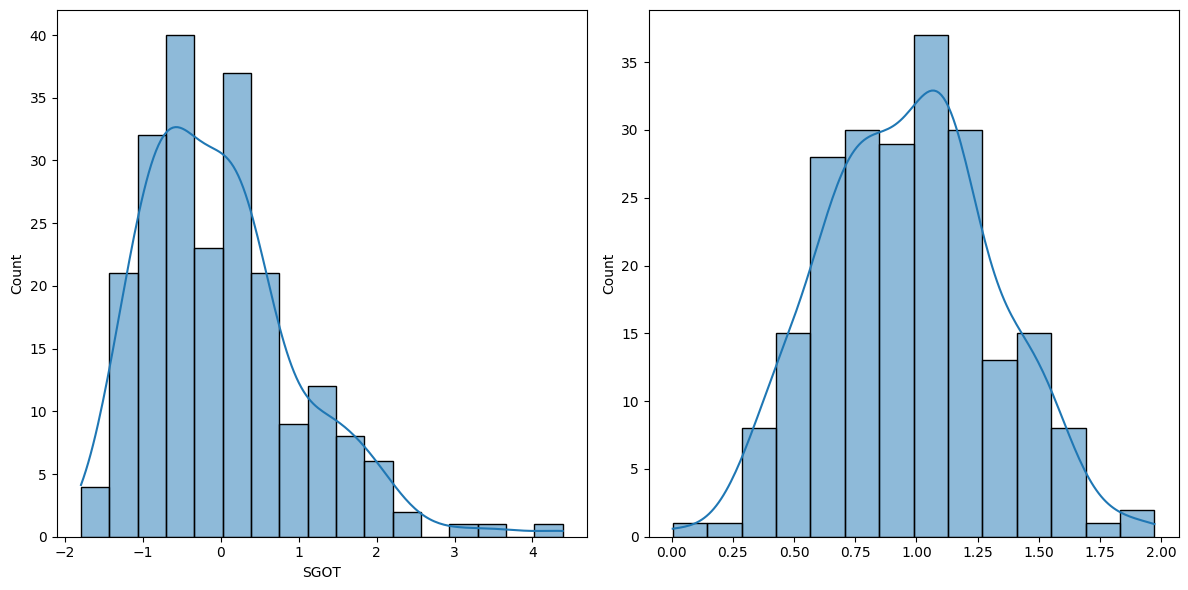

In [13]:
fig, axes = plt.subplots(1, 2, figsize = (12, 6))
sns.histplot(X_train["SGOT"], kde=True, ax=axes[0])
k = pd.Series([np.log1p(x+1.8) for x in X_train["SGOT"]])
sns.histplot(k, kde=True, ax=axes[1])
plt.tight_layout()
plt.show()


In [14]:
X_train["SGOT"] = X_train["SGOT"].apply(lambda x : np.log1p(x + 1.8))
X_test["SGOT"] = X_test["SGOT"].apply(lambda x: np.log1p(x + 1.8))

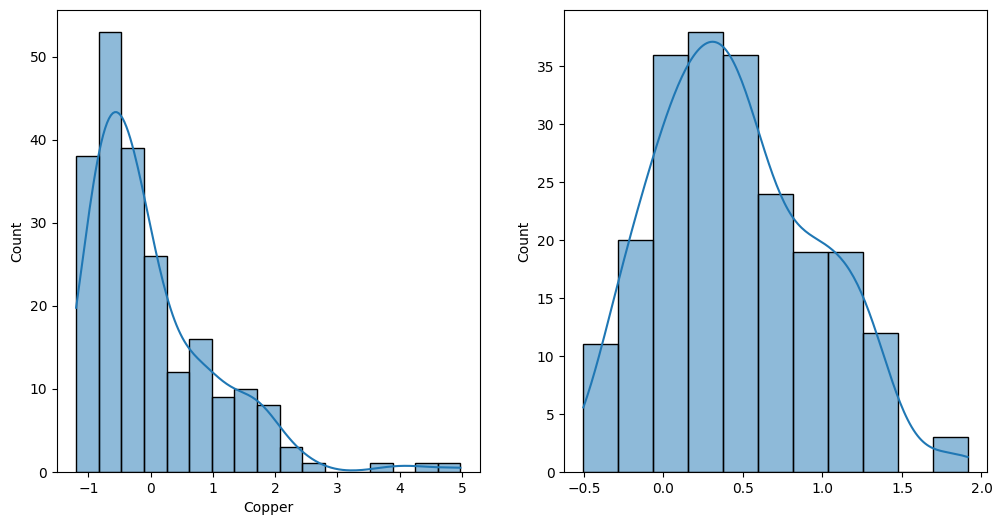

In [15]:
fig1, axes1 = plt.subplots(1, 2, figsize = (12, 6))
sns.histplot(X_train["Copper"], kde=True, ax=axes1[0])
df1_Cop_modified = pd.Series([np.log1p(x+0.8) for x in X_train["Copper"]])
sns.histplot(df1_Cop_modified, kde=True, ax=axes1[1])

X_train["Copper"] = df1_Cop_modified
X_test["Copper"] = pd.Series([np.log1p(x+0.8) for x in X_test["Copper"]])

In [16]:
X_train["Copper"] = X_train["Copper"].apply(lambda x: np.log1p(x+0.8))
X_test["Copper"] = X_test["Copper"].apply(lambda x: np.log1p(x + 0.8))

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [18]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [19]:
y_pred = clf.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_true=y_test, y_pred=y_pred)
print(f"{(score*100): .2f}")

 62.77
